# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [1]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定【data的資料夾路徑】，命名為【data_folder】
data_folder = 'C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data'

# 設定t001為某個data路徑
# 設定t002為pd裡read data的功能
# 註釋一下路徑位置，%s參數(和%d)的使用方法與限制，參考learning。
t001 = os.path.join(data_folder, 'application_train.csv')
t002 = pd.read_csv(t001)
print('Path of read in data: %s' %t001)
print(t002.shape)
t002.head()

Path of read in data: C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data\application_train.csv
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 不解此意義用意
plt.style.use('ggplot')

# 載入另一個繪圖-樣式套件
import seaborn as sns

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 資料整理 ('DAYS_BIRTH'全部取絕對值 )
t002['DAYS_BIRTH'] = abs(t002['DAYS_BIRTH'])
t003 = t002.sort_index(by='DAYS_BIRTH',ascending=False)
print('head\n', t003['DAYS_BIRTH'].head(5))
print('tail\n', t003['DAYS_BIRTH'].tail(5))

head
 265026    25229
124430    25201
63316     25201
143266    25200
169562    25197
Name: DAYS_BIRTH, dtype: int64
tail
 137182    7678
170384    7676
53702     7676
168135    7673
235444    7489
Name: DAYS_BIRTH, dtype: int64


In [5]:
# select欄位的概念，兩個[[]]
t004 = t002[['TARGET', 'DAYS_BIRTH']] #subset
t004.head(15)

,TARGET,DAYS_BIRTH
0,1,9461
1,0,16765
2,0,19046
3,0,19005
4,0,19932
5,0,16941
6,0,13778
7,0,18850
8,0,20099
9,0,14469


In [6]:
# 新建一個欄位【YEARS_BIRTH_YEAR】，是將【DAYS_BIRTH】/365。
# 我真的很討厭拿已經調整過的欄位取代舊欄位，為什麼不保留舊欄位呢？
# 直接創一個新欄位，不是很清楚知道是拿舊欄位創出來的嗎？
# 如果取代掉舊欄位，那資料跑到後面，當程序很多時，我還會記得舊欄位原本是什麼嗎？
# 如果我要拿舊欄位來除以12，不就麻煩了嗎？
# 一定要保留舊欄位！
t004['YEARS_BIRTH_YEAR'] = t004['DAYS_BIRTH'] / 365
t004.head(15)

,TARGET,DAYS_BIRTH,YEARS_BIRTH_YEAR
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219
5,0,16941,46.413699
6,0,13778,37.747945
7,0,18850,51.643836
8,0,20099,55.065753
9,0,14469,39.641096


In [7]:
# 自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = np.linspace(20, 70, num = 11) 
"""
 1. 20(不含)~25(含)
 2. 25(不含)~30(含)
...
 9. 60(不含)~65(含)
10. 65(不含)~70(含)
"""

# 創建新欄位【YEARS_BINNED】
t004['YEARS_BINNED'] = pd.cut(t004['YEARS_BIRTH_YEAR'], bins = bin_cut) 

# 顯示不同組的數量
print(t004['YEARS_BINNED'].value_counts())

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


## 等等！等等！
## 那20(含)以下，70(不含)以上的去哪了？

In [8]:
t004_f1 = t004['YEARS_BIRTH_YEAR'] <= 20
t004_f2 = t004['YEARS_BIRTH_YEAR'] >  70
print(t004[t004_f1])
print(t004[t004_f2])

Empty DataFrame
Columns: [TARGET, DAYS_BIRTH, YEARS_BIRTH_YEAR, YEARS_BINNED]
Index: []
Empty DataFrame
Columns: [TARGET, DAYS_BIRTH, YEARS_BIRTH_YEAR, YEARS_BINNED]
Index: []


## 天公伯啊~ 原來資料被設計過，它只介於20~70...
## 但我資料不會總是被設計過的啊！正常狀況下一定有【<=20、>70】的資料啊，怎辦？

In [9]:
bin_cut2 = np.linspace(30, 60, num = 7) 
"""
 1. 30(不含)~35(含)
...
 6. 55(不含)~60(含)
"""

# 創建新欄位【YEARS_BINNED2】
t004['YEARS_BINNED2'] = pd.cut(t004['YEARS_BIRTH_YEAR'], bins = bin_cut2) 

# 顯示不同組的數量
print(t004['YEARS_BINNED2'].value_counts())

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
Name: YEARS_BINNED2, dtype: int64


In [10]:
t004_f3 = t004['YEARS_BIRTH_YEAR'] <= 30
t004_f4 = t004['YEARS_BIRTH_YEAR'] >  60
print(t004[t004_f3].head(5))
print(t004[t004_f4].head(5))

    TARGET  DAYS_BIRTH  YEARS_BIRTH_YEAR  YEARS_BINNED YEARS_BINNED2
0        1        9461         25.920548  (25.0, 30.0]           NaN
10       0       10197         27.936986  (25.0, 30.0]           NaN
15       0        8728         23.912329  (20.0, 25.0]           NaN
17       0        9776         26.783562  (25.0, 30.0]           NaN
28       0        9994         27.380822  (25.0, 30.0]           NaN
    TARGET  DAYS_BIRTH  YEARS_BIRTH_YEAR  YEARS_BINNED YEARS_BINNED2
23       0       24827         68.019178  (65.0, 70.0]           NaN
38       0       23920         65.534247  (65.0, 70.0]           NaN
43       0       23548         64.515068  (60.0, 65.0]           NaN
62       0       22843         62.583562  (60.0, 65.0]           NaN
79       0       22935         62.835616  (60.0, 65.0]           NaN


## 於是會發現，這種切法，會導致不在設定範圍內的，全部都變成了NaN！
## 如果照教材作法，當現在有有【<20、>=70】的資料時，只會統一變成一種【NaN】，而不會再拆開成【20以下、70以上】。
## 顯然教材這種做法是很侷限的。

In [11]:
# 運用點小技巧，把30以下的收斂成一組，反正我們只想知道30以下的這群人有多少，而不想看這群人分散的狀況。
# 那簡單，我就把30以下的全部都當作30歲就好

# Python的作法是，先建一個新欄位【YEARS_BIRTH_YEAR_ADJ】，仿照原本的【YEARS_BIRTH_YEAR】(一模一樣)
t004['YEARS_BIRTH_YEAR_ADJ'] = t004['YEARS_BIRTH_YEAR']
t004.head(5)

,TARGET,DAYS_BIRTH,YEARS_BIRTH_YEAR,YEARS_BINNED,YEARS_BINNED2,YEARS_BIRTH_YEAR_ADJ
0,1,9461,25.920548,"(25.0, 30.0]",NaN,25.920548
1,0,16765,45.931507,"(45.0, 50.0]","(45.0, 50.0]",45.931507
2,0,19046,52.180822,"(50.0, 55.0]","(50.0, 55.0]",52.180822
3,0,19005,52.068493,"(50.0, 55.0]","(50.0, 55.0]",52.068493
4,0,19932,54.608219,"(50.0, 55.0]","(50.0, 55.0]",54.608219


In [12]:
# 再針對新欄位去改值，一次一次改
# 和SQL的差異在於，SQL是一次寫好全改，Python的概念是一個條件一個條件改
# 有看過Python其他類似一次改好的做法，但都不如一個條件一個條件改的做法簡明
t004.loc[t004['YEARS_BIRTH_YEAR_ADJ'] <= 30,'YEARS_BIRTH_YEAR_ADJ'] = 30 #30易混淆的話，29也可以，只是30也不會收進30~35
t004.loc[t004['YEARS_BIRTH_YEAR_ADJ'] >  60,'YEARS_BIRTH_YEAR_ADJ'] = 61 #60的話，會被收進55~60，所以必須>60才可以，就61吧~
t004.head(5)

,TARGET,DAYS_BIRTH,YEARS_BIRTH_YEAR,YEARS_BINNED,YEARS_BINNED2,YEARS_BIRTH_YEAR_ADJ
0,1,9461,25.920548,"(25.0, 30.0]",NaN,30.000000
1,0,16765,45.931507,"(45.0, 50.0]","(45.0, 50.0]",45.931507
2,0,19046,52.180822,"(50.0, 55.0]","(50.0, 55.0]",52.180822
3,0,19005,52.068493,"(50.0, 55.0]","(50.0, 55.0]",52.068493
4,0,19932,54.608219,"(50.0, 55.0]","(50.0, 55.0]",54.608219


In [13]:
t004_f5 = t004['YEARS_BIRTH_YEAR'] <= 30
t004_f6 = t004['YEARS_BIRTH_YEAR'] >  60
print(t004[t004_f5].head(5))
print(t004[t004_f6].head(5))

    TARGET  DAYS_BIRTH  YEARS_BIRTH_YEAR  YEARS_BINNED YEARS_BINNED2  \
0        1        9461         25.920548  (25.0, 30.0]           NaN   
10       0       10197         27.936986  (25.0, 30.0]           NaN   
15       0        8728         23.912329  (20.0, 25.0]           NaN   
17       0        9776         26.783562  (25.0, 30.0]           NaN   
28       0        9994         27.380822  (25.0, 30.0]           NaN   

    YEARS_BIRTH_YEAR_ADJ  
0                   30.0  
10                  30.0  
15                  30.0  
17                  30.0  
28                  30.0  
    TARGET  DAYS_BIRTH  YEARS_BIRTH_YEAR  YEARS_BINNED YEARS_BINNED2  \
23       0       24827         68.019178  (65.0, 70.0]           NaN   
38       0       23920         65.534247  (65.0, 70.0]           NaN   
43       0       23548         64.515068  (60.0, 65.0]           NaN   
62       0       22843         62.583562  (60.0, 65.0]           NaN   
79       0       22935         62.835616  (60

In [14]:
# 現在已知我們要的分群從30~60有6組(每5為一組)
# 然後還知道有【<=30】和【>60】這兩群人
# 用相同的方法
# 自 25 到 65 歲，切 9 個點 (得到 8 組)
bin_cut3 = np.linspace(25, 65, num = 9) 
"""
但要記得
 1. 25~30: 實際是<=30的都在這組
 2. 30(不含)~35(含)
 3. 35(不含)~40(含)
 4. 40(不含)~45(含)
 5. 45(不含)~50(含)
 6. 50(不含)~55(含)
 7. 55(不含)~60(含)
 8. 60~65: 實際是>60的都在這組
"""

# 創建新欄位【YEARS_BINNED3】
t004['YEARS_BINNED3'] = pd.cut(t004['YEARS_BIRTH_YEAR_ADJ'], bins = bin_cut3) 

# 顯示不同組的數量
print(t004['YEARS_BINNED3'].value_counts())

(25.0, 30.0]    45021
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(60.0, 65.0]    35579
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
Name: YEARS_BINNED3, dtype: int64


In [15]:
#回頭看一下第一次的切法，果然20~30、60~70被我們收在一起了
print(t004['YEARS_BINNED'].value_counts())

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


## 這解法才真的能有效的把所有非null的值給收進來，否則範圍之外的會變成null。

In [16]:
# 我相信有人會說，【先看資料，再決定怎麼切，不會有這問題。】
# 不會有這問題？ 如果你看完資料，發現有少部分人落在70~75、75~80、80~85、85~90、90~95、95~100、甚至100~105時！
# 但你又不想把這少數人每5歲給分出來，而想要讓這群人被叫做【70歲以上】，那你怎麼辦？
# 不可能排除掉這些人，因為這些人的年紀並不是錯誤資料。
# 因此在視覺化上面，把這群人歸類成一類並命名為【70歲以上】，是最好的辦法。

## 回到題目內容

In [17]:
# 繪圖前先排序 / 分組
# 設定t005，根據t004['YEARS_BINNED']作唯一排序
t005 = np.sort(t004['YEARS_BINNED'].unique())

# 看一下排序完的長相
print(t005)
# 真是意義不明，只能背起來了。

[Interval(20.0, 25.0, closed='right') Interval(25.0, 30.0, closed='right')
 Interval(30.0, 35.0, closed='right') Interval(35.0, 40.0, closed='right')
 Interval(40.0, 45.0, closed='right') Interval(45.0, 50.0, closed='right')
 Interval(50.0, 55.0, closed='right') Interval(55.0, 60.0, closed='right')
 Interval(60.0, 65.0, closed='right') Interval(65.0, 70.0, closed='right')]


In [18]:
# 從第1個到第10個，記得Python有個討厭的-1，第一個是0。
print(str(t005[0]))
print(str(t005[1]))
print(str(t005[2]))
print(str(t005[3]))
print(str(t005[4]))
print(str(t005[5]))
print(str(t005[6]))
print(str(t005[7]))
print(str(t005[8]))
print(str(t005[9]))
# 這樣看來不必掛str，呈現起來是一樣的。
# 而且之後sns.distplot的作圖也沒有限定必須轉成str，故教材掛上str，意義不明。
print(t005[0])

(20.0, 25.0]
(25.0, 30.0]
(30.0, 35.0]
(35.0, 40.0]
(40.0, 45.0]
(45.0, 50.0]
(50.0, 55.0]
(55.0, 60.0]
(60.0, 65.0]
(65.0, 70.0]
(20.0, 25.0]


In [19]:
# 由於接著要設定for迴圈，讓i在某個範圍跑，for i in range(x)
# 而x必須是一個整數，依照題目目的，我們需要t005跑10次，所以拿【len(t005)】來作為這個整數
t005_1 = len(t005)
print(t005_1)

10


In [20]:
# range(10)，印出來會變成range(0,10)
t005_2 = range(t005_1)
print(t005_2)

range(0, 10)


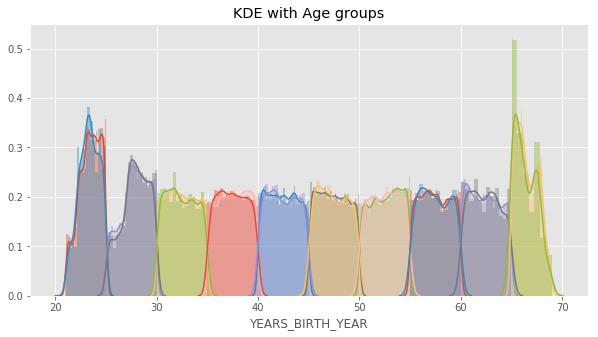

'\n* 以下是社群講師回覆內容：\n* age_data[\'YEARS_BINNED\'] == year_group_sorted[i] => 符合條件 YEARS_BINNED 欄位 = year_group_sorted 的 Boolean Series\n* age_data[\'TARGET\'] == 0 => 符合條件 TARGET 欄位 = 0 的 Boolean Series\n* (age_data...) & (age_data...) => 把兩個條件做 &，也有是兩個條件同時存在時\n* age_data.loc[..., ...] => loc 是一種取值方式，左邊放 Row 條件，右邊放 Column。原本的寫法就是挑出符合上面條件的 YEARS_BIRTH_YEAR 欄位。\n\n如講師回覆，loc的左邊，就類似where的概念；loc的右邊，就類似select column的概念。\n\nsns.distplot(A,B)\n\nA：\nselect "YEARS_BIRTH_YEAR"\nfrom t004\nwhere\n    t004[\'YEARS_BINNED\'] == t005[i]\nand t004[\'TARGET\']       == 0\n\nB：\nlabel = t005[i]\n\n'

In [21]:
# 圖片大小，要先寫
plt.figure(figsize=(10,5))

# 開始作圖
# i跑10次，每跑一次做sns.distplot這件事
for i in t005_2:
    sns.distplot(t004.loc[(t004['YEARS_BINNED'] == t005[i]) & \
                              (t004['TARGET'] == 0), 'YEARS_BIRTH_YEAR'], label = t005[i])
    sns.distplot(t004.loc[(t004['YEARS_BINNED'] == t005[i]) & \
                              (t004['TARGET'] == 1), 'YEARS_BIRTH_YEAR'], label = t005[i])

# 標題 
plt.title('KDE with Age groups')
plt.show()
"""
* 以下是社群講師回覆內容：
* age_data['YEARS_BINNED'] == year_group_sorted[i] => 符合條件 YEARS_BINNED 欄位 = year_group_sorted 的 Boolean Series
* age_data['TARGET'] == 0 => 符合條件 TARGET 欄位 = 0 的 Boolean Series
* (age_data...) & (age_data...) => 把兩個條件做 &，也有是兩個條件同時存在時
* age_data.loc[..., ...] => loc 是一種取值方式，左邊放 Row 條件，右邊放 Column。原本的寫法就是挑出符合上面條件的 YEARS_BIRTH_YEAR 欄位。

如講師回覆，loc的左邊，就類似where的概念；loc的右邊，就類似select column的概念。

sns.distplot(A,B)

A：
select "YEARS_BIRTH_YEAR"
from t004
where
    t004['YEARS_BINNED'] == t005[i]
and t004['TARGET']       == 0

B：
label = t005[i]

"""

## 我是真心不知道把上圖疊加起來是要看三...為什麼不拆開來看呢？

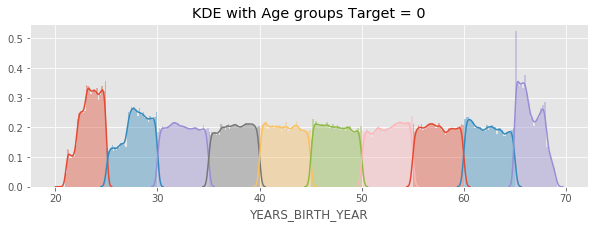

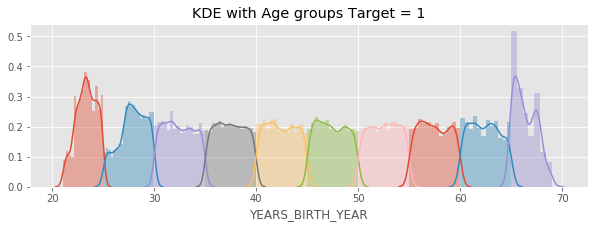

In [22]:
plt.figure(figsize=(10,3))
for i in t005_2:
    sns.distplot(t004.loc[(t004['YEARS_BINNED'] == t005[i]) & \
                              (t004['TARGET'] == 0), 'YEARS_BIRTH_YEAR'], label = t005[i])
plt.title('KDE with Age groups Target = 0')
plt.show()

plt.figure(figsize=(10,3))
for i in t005_2:
    sns.distplot(t004.loc[(t004['YEARS_BINNED'] == t005[i]) & \
                              (t004['TARGET'] == 1), 'YEARS_BIRTH_YEAR'], label = t005[i])
plt.title('KDE with Age groups Target = 1')
plt.show()

In [23]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
t006 = t004.groupby('YEARS_BINNED').mean()
t006

,TARGET,DAYS_BIRTH,YEARS_BIRTH_YEAR,YEARS_BIRTH_YEAR_ADJ
YEARS_BINNED,,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522,30.000000
"(25.0, 30.0]",0.111436,10155.219250,27.822518,30.000000
"(30.0, 35.0]",0.102814,11854.848377,32.479037,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459,61.000000


Text(0.5, 1.0, 'Failure to Repay by Age Group')

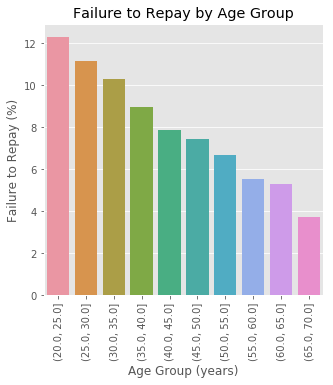

In [24]:
# 圖片大小，要先寫
plt.figure(figsize = (5, 5))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = t006.index.astype(str)
py = 100 * t006['TARGET']
sns.barplot(px, py)

# X軸各內容字樣要以幾度呈現？90度(垂直)？0度(水平)？180度(水平反過來)？
plt.xticks(rotation = 90)

# 標題
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

### Day11教材方向和目標
1. subset的作法(select的概念)
2. bin_cut = np.linspace(20, 70, num = 11) 20~70切10組
3. sns.distplot、sns.barplot
4. SQL中case when的作法，t004.loc[t004['YEARS_BIRTH_YEAR_ADJ'] <= 30,'YEARS_BIRTH_YEAR_ADJ'] = 30。<=30的都列成30。
5. loc是一種取值方式，左邊放Row條件，右邊放Column。

Python的loc意思例如：  
age_data.loc[colA <= 30,colB]  
意思等同：  
select colB from age_data where colA <= 30  
如果只有：  
age_data.loc[colA <= 30]  
意思等同：  
select * from age_data where colA <= 30  

### Day11忽略部分
1. plt.style.use('ggplot')的意義用意
2. sns.distplot所使用的複雜寫法必須熟練
3. Kernel Density Estimation的實際意義
 
### Day11其他補充
BIN這個議題在我職涯中實作過非常多次，我的解法才是最佳的處理方式。